In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('trainingset.csv')
df.head()
dft = pd.read_csv('testset.csv')
df_com = df.append(dft)
df_com.shape

(61, 6)

In [2]:
# Case 1, training for azimuth with obs values
X1 = np.array(df_com.obs_az)
X2 = -1.0/np.cos(np.radians(list(df_com['obs_alt'])))
X3 = -1.0*np.tan(np.radians(list(df_com['obs_alt'])))
X4 = np.cos(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
X5 = np.sin(np.radians(list(df_com['obs_az']))) * np.tan(np.radians(list(df_com['obs_alt'])))
#X5 = np.cos(2.0*np.radians(list(df['obs_az'])))
X = np.column_stack([X1, X2, X3, X4, X5])
#X = X.T
print(X.shape)

(61, 5)


In [3]:
y = np.array(df_com.catalogue_az)
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predicted_training = regr.predict(X)
regr.intercept_ * 3600

-2895.9900265557394

In [4]:
# Calculate basic stats
def get_stats(X, y, dataframe, axis=0):
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    y_predicted = regr.predict(X)
    n = X.shape[0]
    p = X.shape[1]
    MSE_y_train = (np.sum(np.square(y - y_predicted)) / (n - p - 1) )
    RSE_y_train = np.sqrt(MSE_y_train)
    R2_y_train = regr.score(X,y)
    MSM_y_train = (np.sum(np.square(y_predicted - np.mean(y))) / (p) )
    F_statistic_y_train = MSM_y_train / MSE_y_train

    #RSS = np.sum(np.square(y - y_predicted_training))
    #TSS = np.sum(np.square(y - np.mean(y)))
    #print("TSS is : ", TSS)
    #f_stat = ((TSS-RSS)/5)/(RSS/(41-5-1))
    print("RSE is :", RSE_y_train)
    print("R2 score is :", R2_y_train)
    print("F-statistic is :",F_statistic_y_train)

    if not axis:
        h_ms_train = np.mean(np.square((y - y_predicted)*np.cos(dataframe.obs_alt)))
        h_rms_train = np.sqrt(h_ms_train)
        print("horizontal rms error in arcsec ", h_rms_train*3600)
    else:
        v_ms_train = np.mean(np.square((y - y_predicted)))
        v_rms_train = np.sqrt(v_ms_train)
        print("vertical rms error in arcsec ", v_rms_train*3600)
    
    print("coefficients are ", 3600*regr.coef_)
    return y_predicted

_ = get_stats(X, y, df_com)

RSE is : 0.000753854061127
R2 score is : 0.99999999995
F-statistic is : 222170697184.0
horizontal rms error in arcsec  1.52998258878
coefficients are  [ 3599.98679929    50.66002278   -23.50174756   -25.87441276    48.15737231]


In [5]:
3600*regr.coef_

array([ 3599.98679929,    50.66002278,   -23.50174756,   -25.87441276,
          48.15737231])

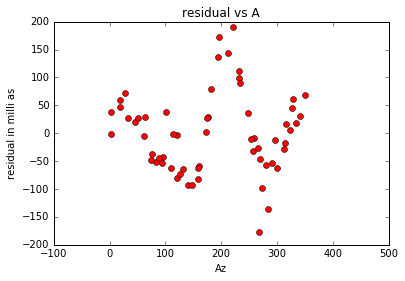

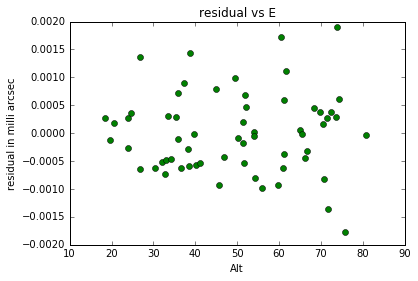

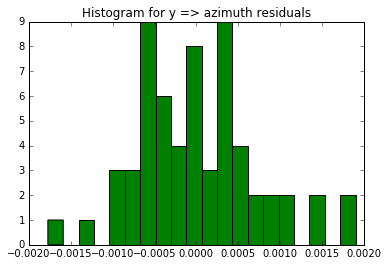

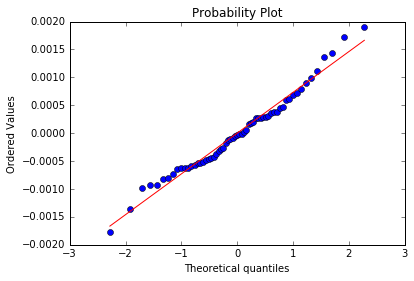

In [6]:
# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training)*100000, 'ro')
plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=20, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

In [7]:
# looks like some quadratic variation in azimuth
#X6 = np.cos(np.radians(29.361232))*np.sin(2.0*np.radians(list(df['obs_az']))) / np.cos(np.radians(list(df['obs_alt'])))
X6 = np.cos(2.0*np.radians(list(df_com['obs_az'])))
X = np.column_stack([X1, X2, X3, X4, X5, X6])
y_predicted_training = get_stats(X, y, df_com)


RSE is : 0.00067006190457
R2 score is : 0.999999999962
F-statistic is : 234342055268.0
horizontal rms error in arcsec  1.32483610559
coefficients are  [  3.59998829e+03   5.10285582e+01  -2.38927148e+01  -2.59575476e+01
   4.82080931e+01   1.71915966e+00]


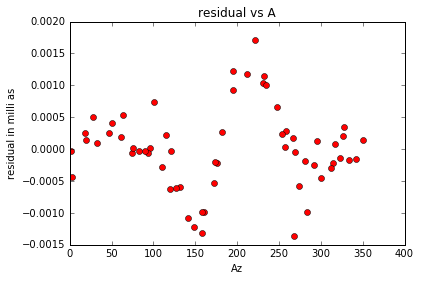

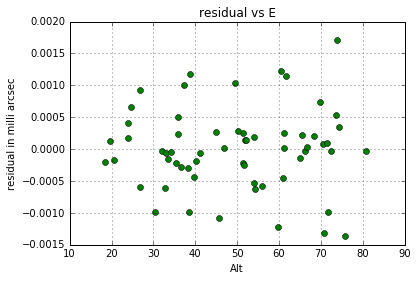

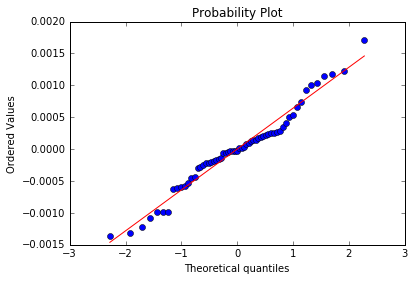

In [8]:
# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

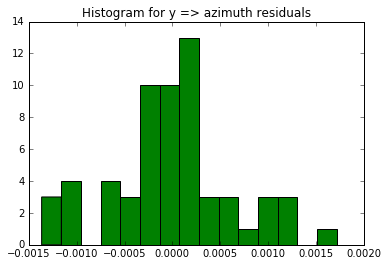

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

RSE is : 0.000296290964664
R2 score is : 0.999999999993
F-statistic is : 719108668325.0
horizontal rms error in arcsec  0.627562614858
coefficients are  [  3.59999593e+03   5.00185081e+01  -2.30360612e+01  -2.59652735e+01
   4.97305216e+01   2.05123459e+00   2.74642544e+00  -1.50491806e+00
   8.66903558e-01  -1.32540324e+00]


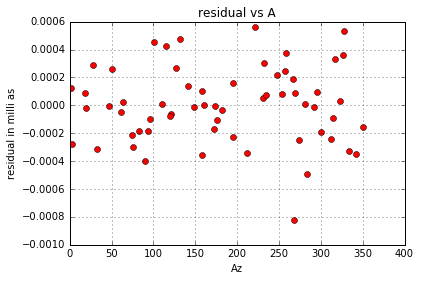

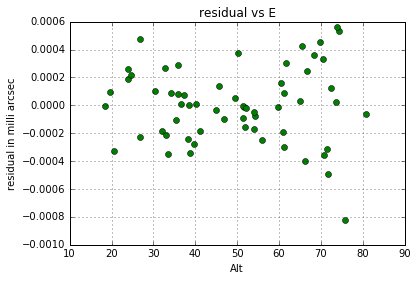

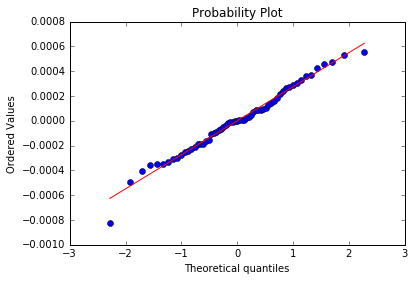

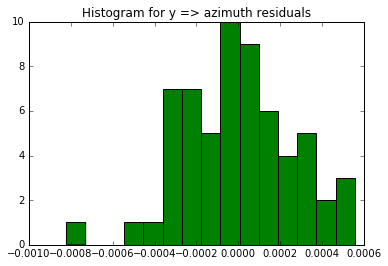

In [10]:
# Looks like higher order sine also present
X7 = np.sin(2.0*np.radians(list(df_com['obs_az'])))
X8 = np.sin(3.0*np.radians(list(df_com['obs_az'])))
X9 = np.sin(4.0*np.radians(list(df_com['obs_az'])))
X10 = np.cos(np.radians(29.361232))*np.sin(np.radians(list(df_com['obs_az']))) / np.cos(np.radians(list(df_com['obs_alt'])))
X = np.column_stack([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10])
y_predicted_training = get_stats(X, y, df_com)

# residual plots at this stage
plt.plot(df_com.obs_az, (y-y_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (y-y_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

0.409961479969 arc seconds is rough accuracy between cv and no cv


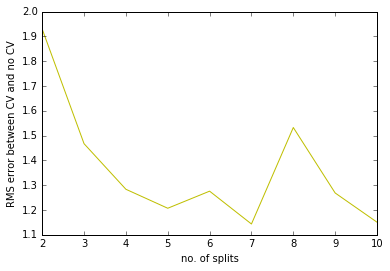

In [11]:
# Performing some CV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=5, shuffle=True)
ols = linear_model.LinearRegression()
cross_val_score(ols, X, y, cv=kfold, n_jobs=1)

y_pred = cross_val_predict(ols, X, y, cv=kfold)

y_diff = np.sqrt(np.sum(np.square(y_pred - y_predicted_training))/61)*3600
print(y_diff, "arc seconds is rough accuracy between cv and no cv")
all_y_pred = list()
for i in range(2,11):
    kfold = KFold(n_splits=i, shuffle=True)
    y_pred = cross_val_predict(ols, X, y, cv=kfold)
    diff = np.sqrt(np.sum(np.square(y_pred - y))/61)*3600
    all_y_pred.append(diff)

#plt.plot(np.arange(2,11,1), all_y_pred, 'yo')
#plt.show()
#all_y_pred
plt.plot([2,3,4,5,6,7,8,9,10], all_y_pred, 'y-')
plt.xlabel('no. of splits')
plt.ylabel('RMS error between CV and no CV')
plt.show()

In [12]:
np.arange(2,11,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


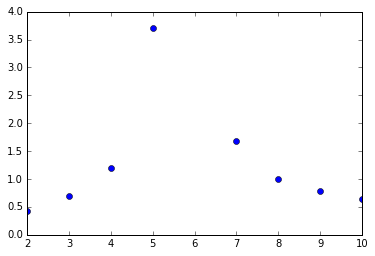

In [13]:
# manually doing validation
mean_rses = list()
for i in range(2,11):
    kfold = KFold(n_splits=i, shuffle=True)
    ols = linear_model.LinearRegression()
    scores = list()
    RSES = list()
    for train_indices, test_indices in kfold.split(X):
        y_fitted = ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        s = ols.score(X[train_indices], y[train_indices])
        scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-10-1) ) ) )
        RSES.append(RSE)
    #print(scores)
    #print(RSES)
    #print("mean RSE is ", np.mean(RSES)*3600)
    mean_rses.append(np.mean(RSES)*3600)
plt.plot(np.arange(2,11,1), mean_rses, 'bo')
plt.show()

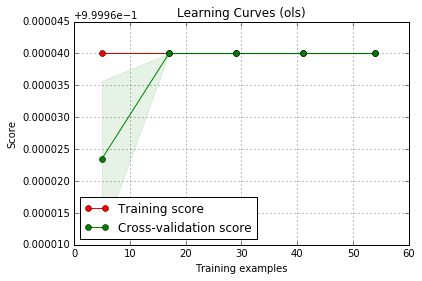

In [14]:
from sklearn.model_selection import learning_curve

def calc_mean_rse(kfold):
    RSES = list()
    for train_indices, test_indices in kfold.split(X):
        y_fitted = ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        #s = ols.score(X[train_indices], y[train_indices])
        #scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-10-1) ) ) )
        RSES.append(RSE)
    #print(scores)
    #print(RSES)
    #print("mean RSE is ", np.mean(RSES)*3600)
    return np.mean(RSES)*3600

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (ols)"

cv = KFold(n_splits=10, shuffle=True)

estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [15]:
from sklearn.feature_selection import f_regression

f_regression(X, y)

(array([  1.67566621e+09,   4.42926512e-02,   5.76889061e-02,
          2.69150466e-02,   4.37206823e+01,   3.70535388e-01,
          1.00233220e+01,   1.56372531e+00,   2.50610073e+00,
          6.20176232e+01]),
 array([  1.38444664e-221,   8.34035228e-001,   8.11019304e-001,
          8.70246174e-001,   1.22248514e-008,   5.45049209e-001,
          2.44617851e-003,   2.16057367e-001,   1.18752454e-001,
          8.90030782e-011]))

In [16]:
# train model for altitude now
lat = np.radians(29.3612)
W1 = np.array(df_com.obs_alt)
W2 = -1.0*np.sin(np.radians(list(df_com['obs_az'])))
W3 = np.cos(np.radians(list(df_com['obs_az'])))
# Adding tube flexure
W4 = np.cos(np.radians(list(df_com['obs_alt'])))
#W4 = (np.cos(lat)*np.cos(np.radians(list(df_com['obs_az'])))*np.sin(np.radians(list(df_com['obs_alt']))) - np.sin(lat)*np.cos(np.radians(list(df_com['obs_alt']))))
# Adding harmonics
#W5 = np.sin(2.0*np.radians(list(df['obs_alt'])))
#W6 = np.sin(2.0*np.radians(list(df['obs_az'])))
W = np.column_stack([W1, W2, W3, W4])

z = np.array(df_com.catalogue_alt)
regr2 = linear_model.LinearRegression()
regr2.fit(W, z)
z_predicted_training = regr2.predict(W)
regr2.intercept_ * 3600

Z_p = get_stats(W, z, df_com, axis=1)

RSE is : 0.000447330786283
R2 score is : 0.999999999361
F-statistic is : 21894224355.2
vertical rms error in arcsec  1.54298031356
coefficients are  [ 3601.25719572   -25.7806186     48.94175235   112.72962814]


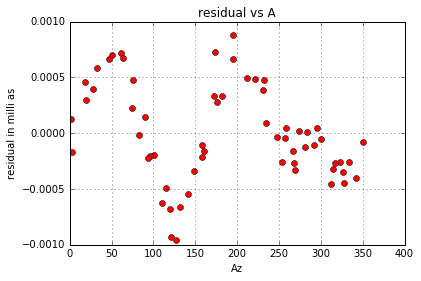

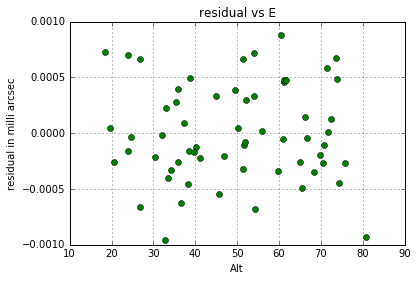

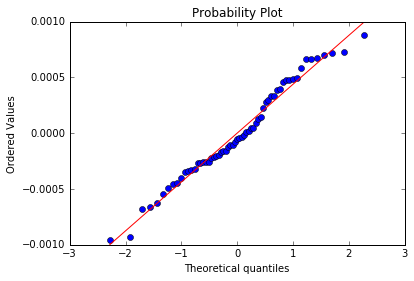

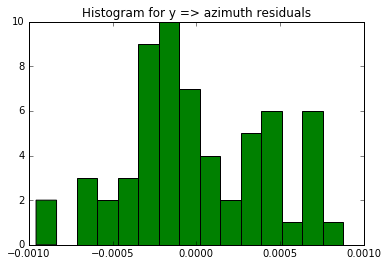

In [17]:
# residual plots at this stage
plt.plot(df_com.obs_az, (z-z_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (z-z_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(z - z_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((z - z_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

intercept is  -12.1344478164
RSE is : 8.64821970343e-05
R2 score is : 0.999999999978
F-statistic is : 260346170930.0
vertical rms error in arcsec  0.28467503677
coefficients are  [  3.60073527e+03  -2.58563737e+01   4.86895122e+01   4.41371418e+01
   2.02227997e-01   1.85226859e+00  -8.95274007e-01   4.93679614e-01
  -4.53404530e-05]


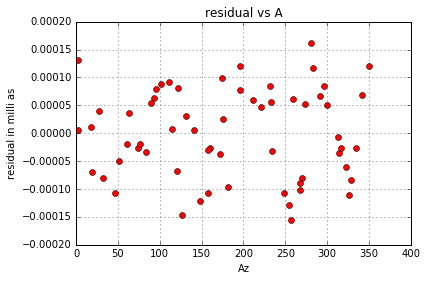

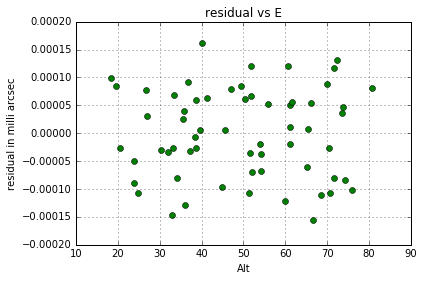

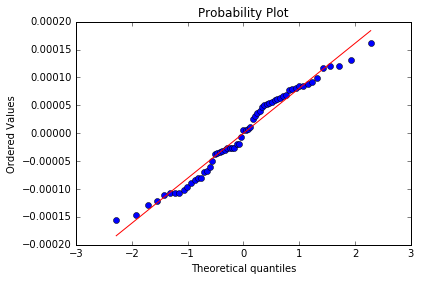

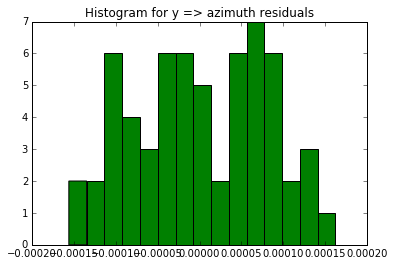

In [18]:
#W9 = np.cos(2.0 * np.radians(list(df_com['obs_alt'])))
#W9 = np.cos(2.0 * np.radians(list(df_com['obs_alt'])))
W9 = np.power(df_com['obs_alt'], 3)
W5 = np.cos(np.radians(list(df_com['obs_az'])))*np.sin(np.radians(list(df_com['obs_alt'])))
W6 = np.sin(np.radians(list(2.0*df_com['obs_az'])))
W7 = np.cos(np.radians(list(3.0*df_com['obs_az'])))
#W10 = np.sin(np.radians(list(3.0*df_com['obs_az'])))
W8 = np.cos(np.radians(list(2.0*df_com['obs_az'])))
W = np.column_stack([W1, W2, W3, W4, W5, W6, W7, W8, W9])

z = np.array(df_com.catalogue_alt)
regr2 = linear_model.LinearRegression()
regr2.fit(W, z)
z_predicted_training = regr2.predict(W)
print('intercept is ', regr2.intercept_ * 3600)

Z_p = get_stats(W, z, df_com, axis=1)

# residual plots at this stage
plt.plot(df_com.obs_az, (z-z_predicted_training), 'ro')
#plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.grid()
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df_com.obs_alt, (z-z_predicted_training), 'go')
#plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.grid()
plt.show()

stats.probplot(z - z_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((z - z_predicted_training), bins=15, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

In [19]:
# calculate studentized residuals here

In [20]:
def estimate_test_error(X, y, folds=5):
    RSES = list()
    ols = linear_model.LinearRegression()
    kfold = KFold(n_splits=folds, shuffle=True)
    for train_indices, test_indices in kfold.split(X):
        ols.fit(X[train_indices], y[train_indices])
        y_predict = ols.predict(X[test_indices])
        n = len(test_indices)
        p = X.shape[1]
        #s = ols.score(X[train_indices], y[train_indices])
        #scores.append(s)
        RSE = np.sqrt( np.sum( np.square( (y[test_indices] - y_predict)/(n-p-1) ) ) )
        RSES.append(RSE)
    print("mean RSE after validation is ", np.mean(RSES)*3600, ' arcseconds')
    
estimate_test_error(W, z)

def 

mean RSE after validation is  0.535341994731  arcseconds


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean RSE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt